In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('14-classwork/water_quality_complaints.csv')
df.set_index('Unique Key')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,39508672,06/19/2018 12:13:00 PM,06/26/2018 12:00:00 AM,DEP,Department of Environmental Protection,Water Quality,Other Water Problem (Use Comments) (QZZ),NaN,11228.0,8124 11 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.619269,-74.016044,"(40.619268530962664, -74.01604370926628)"
1,39508033,06/19/2018 10:49:00 AM,07/03/2018 12:00:00 AM,DEP,Department of Environmental Protection,Water Quality,Cloudy Or Milky Water (QB1),NaN,11216.0,682 ST JOHNS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672019,-73.955479,"(40.672018532199964, -73.95547900185657)"
2,39507718,06/18/2018 04:27:00 PM,NaN,DEP,Department of Environmental Protection,Water Quality,"Taste/Odor, Chlorine (QA1)",NaN,11201.0,56 GARDEN PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691971,-73.996578,"(40.69197061270659, -73.99657788919535)"
3,39507007,06/19/2018 12:14:00 PM,06/20/2018 10:47:00 AM,DEP,Department of Environmental Protection,Water Quality,unknown odor/taste in drinking water (QA6),NaN,10011.0,328 WEST 19 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743251,-74.001274,"(40.74325100587516, -74.00127390401387)"
4,39505417,06/19/2018 09:19:00 PM,NaN,DEP,Department of Environmental Protection,Water Quality,"Cloudy Or Milky, Other (Use Comments) (QBZ)",NaN,11434.0,171-01 120 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683281,-73.774087,"(40.683281279255446, -73.77408693952944)"


In [6]:
df['Year'] = df['Created Date'].str.extract('(\d\d\d\d)')

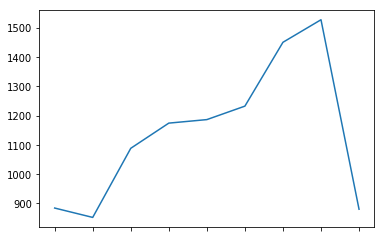

In [9]:
df['Year']\
  .value_counts()\
  .sort_index()\
  .plot()

## Dealing with time in pandas

In [10]:
df['Created Date'].head()

0    06/19/2018 12:13:00 PM
1    06/19/2018 10:49:00 AM
2    06/18/2018 04:27:00 PM
3    06/19/2018 12:14:00 PM
4    06/19/2018 09:19:00 PM
Name: Created Date, dtype: object

In [14]:
df['created_at'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y '
                                                             '%H:%M:%S %p')

When "grouping" in time, instead of `groupby()`, use `resample()`

Quick Docs [here](https://stackoverflow.com/questions/17001389/pandas-resample-documentation/17001474#17001474)

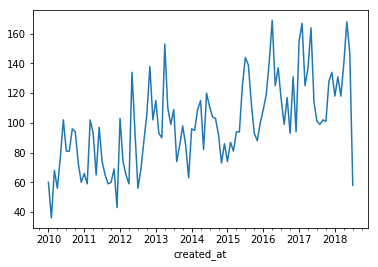

In [17]:
df.resample('M', on='created_at').count()['created_at'].plot()

In [20]:
df[df['created_at'] > '2011-01-01'].shape

(9389, 40)

In [22]:
# use `.dt` to access datetime functions
# dayofweek gets the day of the week which can be used for grouping

df['created_at'].dt.dayofweek.value_counts()

0    1810
1    1808
2    1800
3    1646
4    1565
5     885
6     759
Name: created_at, dtype: int64

In [24]:
df['created_at'].dt.month.value_counts().sort_index()

1      896
2      861
3      899
4     1016
5     1019
6     1035
7      850
8      730
9      763
10     737
11     785
12     682
Name: created_at, dtype: int64

In [26]:
df.groupby(by=df['created_at'].dt.month)['Incident Zip'].median()

created_at
1     11102.5
2     11202.0
3     11209.0
4     11207.0
5     11206.0
6     11203.0
7     11102.0
8     11105.0
9     11211.0
10    11004.0
11    11204.0
12    11209.0
Name: Incident Zip, dtype: float64

# Visas

In [28]:
visas_df = pd.read_csv('14-classwork/visas-by-continent-long.csv')
visas_df

,year,continent,visas
0,1997,Africa,534420.00
1,1998,Africa,568142.00
2,1999,Africa,599452.00
3,2000,Africa,655136.00
4,2001,Africa,697870.00
5,2002,Africa,498682.00
6,2003,Africa,478112.00
7,2004,Africa,501824.00
8,2005,Africa,505656.00
9,2006,Africa,509844.00


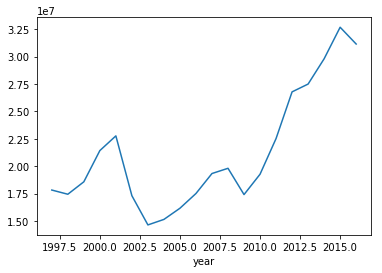

In [32]:
visas_df.groupby('year')['visas'].sum().plot()

In [35]:
visas_df['date_year'] = pd.to_datetime(visas_df['year'], format='%Y')

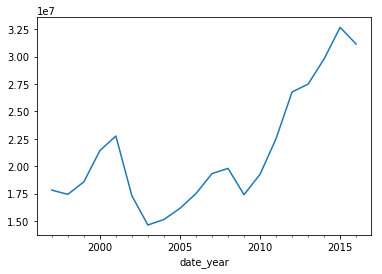

In [36]:
visas_df.groupby('date_year')['visas'].sum().plot()